<a href="https://colab.research.google.com/github/ignyz/Numerical-methods-and-algorithms/blob/main/L3_3_Parametrinis_interpoliavimas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

51
51
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50]
[49.377      49.37029301 49.36298659 49.35512001 49.34673189 49.33786021
 49.32854238 49.31881528 49.30871533 49.29827845 49.28754022 49.27653581
 49.26530012 49.25386773 49.24227303 49.23055018 49.2187332  49.20685602
 49.19495246 49.18305633 49.17120146 49.1594217  49.14775102 49.13622349
 49.12487338 49.11373515 49.10284351 49.09223348 49.0819404  49.072     ]


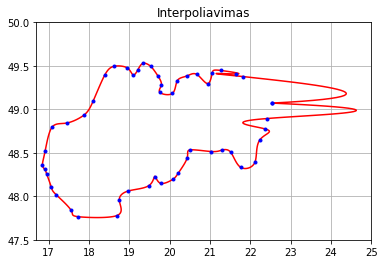

In [ ]:
#!/usr/bin/env python
 
import numpy as np
from numpy import linalg as LA
import numpy
import math
import matplotlib.pyplot as plt
import time
import sympy as sym
from numpy import *
from matplotlib.pyplot import *
from scipy.ndimage import gaussian_filter1d
 
 
def calculateDistance(x1, y1, x2, y2):
  dist = math.sqrt((x2 - x1)**2 + (y2 - y1)**2)
  return dist
 
 
def ApskGlobalu(a, x, r, y, nzz):
  x.astype(float)

  nz = 0
  nz = nzz
  di = x[nz+1] - x[nz]
  #print("Nz", nzz)
  s = r - x[nz]
  a1 = a[nz] * (s**2)/2
  a2 = a[nz]*(s**3)/(6*di)
  a3 = a[nz+1] * ((s**3)/(6*(di)))
  a4 = ((y[nz+1] - y[nz])/di) * s
  a5 = a[nz] * (di/3)*s
  a6 = a[nz+1] * (di/6)*s
  ggg = a1 - a2 + a3 + a4 - a5 - a6 + y[nz]
  return ggg
 
def ApskGlobaluItempta(a, x, r, y, nzz,sgm):
  x.astype(float)

  nz = 0
  nz = nzz
  di = x[nz+1] - x[nz]
  #print("Nz", nzz)
  s = r - x[nz]
  a1 = (a[nz]/sgm**2) * ((math.sinh(sgm*(di-s)))/ math.sinh(sgm*di))
  a2 = (y[nz] - a[nz]/(sgm**2)) * (di - s / di)


  a3 = a[nz+1]/sgm**2 * math.sinh(sgm*s)/sinh(sgm*di)
  a4 = (y[nz+1]-(a[nz+1]/sgm**2))*s/di
  ggg = a1 + a2 + a3 + a4
  return ggg
############
 
# visi taskai
Xd = np.array([ 22.54,22.532,22.525,22.52,22.521,22.505,22.467,22.449,22.427,22.415,22.414,22.414,22.412,22.402,22.378,22.371,22.369,22.362,22.362,22.364,22.366,22.363,22.356,22.348,22.338,22.331,22.328,22.329,22.322,22.31,22.294,22.282,22.256,22.243,22.236,22.225,22.219,22.154,22.139,22.137,22.148,22.145,22.134,22.133,22.114,22.096,22.078,22.018,22,21.982,21.929,21.915,21.884,21.841,21.789,21.759,21.728,21.701,21.678,21.622,21.613,21.6,21.592,21.575,21.538,21.522,21.515,21.506,21.499,21.491,21.473,21.439,21.425,21.373,21.339,21.322,21.302,21.294,21.288,21.277,21.262,21.25,21.238,21.22,21.187,21.109,21.084,21.064,21.036,21.007,20.981,20.946,20.891,20.86,20.845,20.816,20.8,20.784,20.573,20.511,20.482,20.481,20.48,20.482,20.483,20.483,20.483,20.482,20.468,20.466,20.436,20.421,20.409,20.37,20.349,20.324,20.295,20.272,20.26,20.249,20.229,20.218,20.188,20.171,20.153,20.143,20.135,20.122,20.118,20.113,20.105,20.097,20.078,20.038,20.035,19.997,19.974,19.929,19.905,19.884,19.846,19.822,19.786,19.776,19.767,19.769,19.775,19.774,19.757,19.733,19.687,19.677,19.655,19.644,19.634,19.623,19.531,19.514,19.503,19.494,19.482,19.481,19.481,19.481,19.482,19.483,19.484,19.483,19.482,19.428,19.293,19.233,19.223,19.099,19.039,19.019,18.996,18.982,18.934,18.838,18.821,18.794,18.785,18.765,18.756,18.743,18.745,18.751,18.755,18.745,18.742,18.749,18.778,18.816,18.815,18.79,18.768,18.75,18.717,18.693,18.664,18.634,18.597,18.553,18.348,18.273,18.236,18.113,17.884,17.826,17.742,17.719,17.677,17.666,17.658,17.64,17.619,17.604,17.593,17.583,17.573,17.56,17.527,17.517,17.492,17.482,17.472,17.369,17.338,17.273,17.262,17.221,17.185,17.148,17.125,17.093,17.07,17.075,17.063,17.059,17.065,17.07,17.08,17.067,17.062,17.047,17.037,17.021,17.007,16.982,16.975,16.975,16.97,16.954,16.954,16.955,16.954,16.951,16.944,16.933,16.924,16.917,16.913,16.912,16.909,16.905,16.903,16.898,16.9,16.904,16.906,16.902,16.892,16.881,16.875,16.855,16.848,16.844,16.845,16.847,16.849,16.852,16.861,16.865,16.875,16.901,16.906,16.914,16.93,16.947,16.949,16.954,16.945,16.948,16.963,16.975,17.025,17.05,17.084,17.099,17.105,17.114,17.167,17.212,17.26,17.374,17.392,17.411,17.43,17.453,17.468,17.498,17.535,17.727,17.745,17.779,17.796,17.82,17.841,17.86,17.879,17.887,17.895,17.901,17.914,17.935,17.959,18.013,18.046,18.076,18.096,18.103,18.102,18.101,18.105,18.118,18.136,18.161,18.19,18.325,18.362,18.385,18.388,18.417,18.439,18.482,18.515,18.523,18.528,18.53,18.536,18.556,18.6,18.629,18.636,18.643,18.676,18.705,18.733,18.774,18.792,18.833,18.932,18.961,18.952,18.953,18.958,18.961,18.957,18.962,18.982,19.007,19.046,19.068,19.077,19.097,19.106,19.117,19.142,19.173,19.18,19.182,19.189,19.192,19.205,19.209,19.211,19.209,19.206,19.204,19.22,19.234,19.249,19.265,19.284,19.315,19.325,19.34,19.347,19.434,19.438,19.443,19.449,19.457,19.474,19.482,19.505,19.517,19.535,19.552,19.557,19.574,19.595,19.635,19.63,19.629,19.629,19.627,19.627,19.685,19.706,19.727,19.76,19.769,19.769,19.779,19.784,19.79,19.788,19.78,19.78,19.78,19.783,19.797,19.797,19.799,19.799,19.806,19.807,19.809,19.806,19.8,19.794,19.79,19.752,19.748,19.761,19.786,19.832,19.854,19.868,19.888,19.906,19.938,19.966,20.017,20.05,20.07,20.08,20.086,20.098,20.105,20.111,20.13,20.136,20.138,20.16,20.17,20.192,20.207,20.284,20.289,20.296,20.302,20.304,20.307,20.318,20.33,20.37,20.422,20.422,20.438,20.522,20.544,20.568,20.579,20.595,20.605,20.614,20.636,20.674,20.69,20.778,20.794,20.817,20.834,20.849,20.868,20.884,20.901,20.919,20.942,20.964,20.997,21.017,21.033,21.054,21.073,21.081,21.069,21.045,21.033,21.054,21.069,21.109,21.125,21.143,21.157,21.173,21.194,21.211,21.242,21.261,21.274,21.33,21.428,21.444,21.482,21.496,21.514,21.53,21.601,21.62,21.63,21.649,21.659,21.666,21.682,21.692,21.709,21.742,21.758,21.768,21.782,21.799,21.82,21.838,21.875,21.928,21.964,21.993,22.006,22.012,22.041,22.112,22.144,22.156,22.166,22.19,22.198,22.209,22.209,22.206,22.208,22.216,22.263,22.318,22.339,22.39,22.427,22.505,22.54])
Yd = np.array([ 49.072,49.056,49.033,49.01,48.993,48.984,48.981,48.971,48.929,48.912,48.907,48.894,48.888,48.879,48.865,48.858,48.856,48.844,48.836,48.828,48.794,48.788,48.776,48.768,48.763,48.756,48.743,48.722,48.7,48.682,48.668,48.662,48.657,48.651,48.644,48.628,48.621,48.586,48.57,48.549,48.509,48.493,48.477,48.405,48.389,48.379,48.376,48.38,48.379,48.375,48.373,48.369,48.357,48.353,48.336,48.334,48.341,48.354,48.372,48.43,48.44,48.482,48.493,48.496,48.495,48.5,48.507,48.526,48.535,48.54,48.545,48.558,48.561,48.55,48.55,48.548,48.54,48.531,48.52,48.509,48.503,48.506,48.513,48.519,48.514,48.489,48.493,48.506,48.515,48.518,48.517,48.519,48.541,48.543,48.546,48.564,48.569,48.569,48.537,48.534,48.526,48.519,48.51,48.493,48.489,48.486,48.482,48.479,48.465,48.464,48.442,48.429,48.414,48.334,48.305,48.28,48.26,48.252,48.256,48.264,48.271,48.268,48.249,48.244,48.245,48.248,48.247,48.237,48.23,48.212,48.203,48.198,48.194,48.177,48.176,48.168,48.158,48.13,48.124,48.13,48.153,48.158,48.149,48.15,48.159,48.167,48.176,48.186,48.2,48.203,48.197,48.2,48.218,48.225,48.227,48.227,48.211,48.204,48.189,48.151,48.135,48.134,48.134,48.133,48.133,48.127,48.122,48.116,48.111,48.086,48.088,48.062,48.061,48.071,48.065,48.065,48.066,48.062,48.054,48.04,48.03,47.993,47.988,47.985,47.982,47.971,47.967,47.963,47.952,47.911,47.889,47.871,47.851,47.833,47.832,47.826,47.822,47.814,47.788,47.778,47.776,47.78,47.791,47.793,47.777,47.756,47.754,47.762,47.753,47.75,47.765,47.774,47.789,47.797,47.807,47.819,47.829,47.834,47.833,47.83,47.83,47.838,47.872,47.876,47.88,47.883,47.889,47.981,47.999,48.005,48.007,48.015,48.02,48.005,48.02,48.027,48.036,48.052,48.059,48.06,48.079,48.089,48.098,48.107,48.113,48.131,48.136,48.137,48.143,48.161,48.177,48.199,48.217,48.253,48.257,48.269,48.273,48.277,48.278,48.285,48.288,48.291,48.297,48.301,48.307,48.312,48.314,48.316,48.321,48.327,48.331,48.339,48.347,48.353,48.355,48.356,48.36,48.366,48.377,48.381,48.384,48.39,48.444,48.458,48.472,48.497,48.51,48.519,48.528,48.54,48.545,48.557,48.604,48.623,48.636,48.65,48.746,48.774,48.794,48.806,48.825,48.834,48.86,48.866,48.858,48.82,48.822,48.83,48.838,48.843,48.838,48.817,48.813,48.863,48.873,48.912,48.921,48.923,48.921,48.922,48.934,48.947,48.978,48.993,49.01,49.019,49.022,49.019,49.029,49.047,49.07,49.092,49.137,49.143,49.17,49.203,49.233,49.259,49.277,49.311,49.33,49.342,49.39,49.385,49.395,49.429,49.441,49.446,49.455,49.473,49.482,49.49,49.486,49.496,49.497,49.496,49.485,49.479,49.48,49.505,49.51,49.51,49.504,49.493,49.476,49.462,49.448,49.433,49.4,49.389,49.387,49.388,49.403,49.406,49.404,49.395,49.391,49.391,49.394,49.402,49.41,49.423,49.442,49.443,49.443,49.445,49.452,49.456,49.459,49.461,49.493,49.507,49.516,49.521,49.524,49.524,49.525,49.529,49.533,49.595,49.6,49.602,49.6,49.598,49.579,49.574,49.563,49.543,49.493,49.461,49.454,49.445,49.442,49.441,49.435,49.43,49.414,49.402,49.402,49.389,49.388,49.389,49.398,49.393,49.393,49.374,49.358,49.309,49.305,49.298,49.293,49.293,49.29,49.283,49.283,49.281,49.281,49.275,49.275,49.271,49.265,49.263,49.262,49.259,49.219,49.206,49.194,49.188,49.186,49.191,49.201,49.214,49.223,49.225,49.216,49.184,49.173,49.183,49.208,49.243,49.253,49.264,49.276,49.304,49.309,49.307,49.306,49.312,49.329,49.334,49.339,49.343,49.357,49.371,49.38,49.387,49.392,49.392,49.382,49.383,49.4,49.403,49.374,49.371,49.376,49.383,49.396,49.4,49.4,49.398,49.402,49.4,49.331,49.324,49.321,49.322,49.321,49.311,49.3,49.293,49.29,49.296,49.308,49.339,49.352,49.355,49.355,49.357,49.366,49.381,49.391,49.4,49.414,49.419,49.425,49.424,49.416,49.405,49.398,49.401,49.411,49.441,49.449,49.447,49.428,49.41,49.41,49.415,49.412,49.417,49.421,49.426,49.423,49.419,49.407,49.402,49.402,49.404,49.402,49.391,49.357,49.349,49.353,49.364,49.375,49.377,49.37,49.348,49.331,49.309,49.278,49.243,49.211,49.197,49.189,49.175,49.172,49.171,49.173,49.172,49.164,49.157,49.15,49.144,49.14,49.131,49.132,49.126,49.093,49.086,49.083,49.072])
############
 
intrp_task = 9;Y = np.array([49.072, 48.354, 48.305, 48.061, 48.005, 48.51, 49.385, 49.6, 49.276, 49.401, 49.072]);X = np.array([22.54, 21.701, 20.349, 19.223, 17.273,     16.906, 18.417, 19.438, 20.111, 21.194, 22.54])
 
#intrp_task = 5
#Y = np.array([49.072,48.354,48.305,48.061,48.005])
#X = np.array([22.54,21.701,20.349,19.223,17.273])
 
############
intrp_task = 19;Y = np.array([49.072,48.7,48.341,48.514,48.414,48.153,48.086,47.814,47.883,48.253,48.39,48.843,49.259,49.462,49.521,49.398,49.216,49.374,49.391,49.402,49.072]);X = np.array([22.54,22.322,21.728,21.187,20.409,19.846,19.428,18.75,17.482,16.954,16.852,17.453,18.161,18.953,19.265,19.76,19.966,20.522,21.045,21.692,22.54])
############
intrp_task = 49;X = np.array([22.54, 22.414, 22.356, 22.243, 22.114, 21.759, 21.515, 21.294, 21.036, 20.511, 20.436, 20.218, 20.078, 19.776, 19.634, 19.484, 18.982, 18.755, 18.693, 17.742, 17.56, 17.185, 17.067, 16.954, 16.905, 16.848, 16.914, 17.084, 17.453, 17.879, 18.103, 18.388, 18.629, 18.952, 19.097, 19.211, 19.34, 19.535, 19.706, 19.797, 19.761, 20.07, 20.192, 20.422, 20.674, 20.942, 21.054, 21.274, 21.649, 21.82, 22.54]);Y = np.array([49.072, 48.894, 48.776, 48.651, 48.389, 48.334, 48.507, 48.531, 48.515, 48.534, 48.442, 48.268, 48.194, 48.15, 48.227, 48.122, 48.062, 47.952, 47.778, 47.765, 47.838, 48.02, 48.107, 48.257, 48.312, 48.36, 48.519, 48.794, 48.843, 48.934, 49.092, 49.39, 49.496, 49.476, 49.395, 49.452, 49.529, 49.493, 49.388, 49.283, 49.194, 49.183, 49.329, 49.383, 49.402, 49.296, 49.414, 49.447, 49.407, 49.377, 49.072])
############
 
# 81 taskas
#intrp_task = 81;Y = np.array([49.072,48.971,48.865,48.788,48.7,48.628,48.477,48.375,48.341,48.496,48.545,48.531,48.514,48.519,48.537,48.486,48.414,48.264,48.247,48.177,48.153,48.186,48.227,48.134,48.086,48.066,47.985,47.889,47.814,47.777,47.774,47.833,47.883,48.02,48.06,48.136,48.253,48.288,48.316,48.355,48.39,48.528,48.65,48.86,48.843,48.921,48.993,49.07,49.259,49.395,49.49,49.48,49.462,49.403,49.402,49.452,49.521,49.6,49.543,49.435,49.398,49.293,49.265,49.188,49.216,49.264,49.329,49.387,49.374,49.398,49.321,49.339,49.391,49.405,49.428,49.426,49.402,49.377,49.211,49.172,49.132,49.072]);X= np.array([22.54,22.449,22.378,22.363,22.322,22.225,22.134,21.982,21.728,21.575,21.473,21.294,21.187,20.946,20.573,20.483,20.409,20.249,20.135,20.038,19.846,19.774,19.634,19.481,19.428,18.996,18.765,18.742,18.75,18.348,17.719,17.593,17.482,17.185,17.059,17.037,16.954,16.924,16.898,16.875,16.852,16.93,16.975,17.167,17.453,17.796,17.901,18.096,18.161,18.439,18.556,18.733,18.953,19.046,19.173,19.211,19.265,19.438,19.517,19.63,19.76,19.78,19.806,19.786,19.966,20.105,20.192,20.307,20.522,20.636,20.849,20.997,21.045,21.157,21.33,21.601,21.692,21.82,22.012,22.198,22.318,22.54])
 
# atstumas tarp x tasku
D = np.zeros(len(X)-1)
 
for i in range(len(D)):
    D[i] = X[i+1] - X[i]
    
 
############  ##########
print(len(X))
print(len(Y))
N = len(X)
n = N-1
Ny = len(Y)
x = zeros(len(X))
y = zeros(len(Y))
x = reshape(X, len(X), order='A')
y = reshape(Y, len(Y), order='A')
t = np.arange(0,len(x))
print(t)
D = np.ones_like(D)
#####################################
A = zeros((N, N), dtype=float)
fdd1 = 0
for dd in range(N-2):
    A[dd, dd] = D[dd]/6
    A[dd, dd+1] = (D[dd+1]+D[dd])/3
    A[dd, dd+2] = D[dd+1]/6
dd = dd + 1
A[dd, 0] = D[0]/3
A[dd, 1] = D[0]/6
A[dd, N-2] = D[n-1]/6
A[dd, N-1] = D[n-1]/3
dd = dd + 1
A[dd, 0] = 1
A[dd, N-1] = -1
B = np.delete(A, 0, 1)
B = np.delete(B, N-2, 1)
B = np.delete(B, N-1, 0)
B = np.delete(B, N-2, 0)
##################################### NEWWWWWWWWWWWWWW
'''sigma = -2
A = zeros((N, N), dtype=float)
fdd1 = 0
for dd in range(N-2):
    A[dd, dd] = 1/sigma**2*D[dd]  - 1 / ( sigma * math.sinh(sigma*D[dd]))
    A[dd, dd+1] = cosh(sigma*D[dd])/(sigma*sinh(sigma*D[dd+1]))+((math.cosh(sigma*D[dd+1]))/(sigma*math.sinh(sigma*D[dd+1])))-(1/(sigma**2*D[dd]))-(1/(sigma*D[dd+1]))
    A[dd, dd+2] = 1/(sigma**2*D[dd+1])-(1/(sigma*sinh(sigma*D[dd+1])))
dd = dd + 1
A[dd, 0] = -1*cosh(sigma*D[dd])/(sigma*sinh(sigma*D[dd])) + 1/(sigma**2*D[dd])
A[dd, 1] = 1/(sigma*math.sinh(sigma*D[dd]))-1/(sigma**2*D[dd])
A[dd, N-2] = 1/(sigma)*sinh((sigma)*D[n-1]) - 1/((sigma)**2*D[n-1])
A[dd, N-1] = -1 * cosh((sigma)*D[n-1])/((sigma)*sinh((sigma)*D[n-1]) + 1/((sigma)**2*D[n-1]))
dd = dd + 1
A[dd, 0] = 1
A[dd, N-1] = -1
B = np.delete(A, 0, 1)
B = np.delete(B, N-2, 1)
B = np.delete(B, N-1, 0)
B = np.delete(B, N-2, 0)
#print(A)'''
############################
YY = zeros(N)
YY = numpy.reshape(YY, (N, 1))
for i in range(N-2):
    YY[i] = (Y[i+2]-Y[i+1])/D[i+1] - (Y[i+1]-Y[i])/D[i]
 
i = i+1
YY[i] = (Y[1]-Y[0])/D[0]-(Y[n]-Y[n-1])/D[n-1]
################################
FF = linalg.solve(A, YY)
############################
XX = zeros(N)
XX = numpy.reshape(XX, (N, 1))
for i in range(N-2):
    XX[i] = (X[i+2]-X[i+1])/D[i+1] - (X[i+1]-X[i])/D[i]
 
i = i+1
XX[i] = (X[1]-Y[0])/D[0]-(X[n]-X[n-1])/D[n-1]
################################
FFX = linalg.solve(A, XX)
# print(FF)
################################([16.7, 22.7, 47.5, 50])
 
for j in range(len(X)-1):
    ttt = linspace(t[j], t[j+1], 30)
    yf = zeros(len(ttt))
    xf = zeros(len(ttt))
    for i in range(0, len(ttt)):
        yf[i] = ApskGlobalu(FF, t, ttt[i], Y, j)
        xf[i] = ApskGlobalu(FFX, t, ttt[i], X, j)
        yf[i] = ApskGlobaluItempta(FF, t, ttt[i], Y, j,-1)
        xf[i] = ApskGlobaluItempta(FFX, t, ttt[i], X, j,-1)
    plot(xf, yf, 'r-')
print(yf)
 
################################
x = reshape(X, N, order='A')
y = reshape(Y, N, order='A')
 
plot(x, y, 'b.')
#plot(Xd, Yd, 'b-')
#plt.legend(['Interpoliuotas daugianaris', 'Taškai',
 #           'Globalus splainas'], loc='best')
plt.axis([16.7, 25, 47.5, 50])
plt.title('Interpoliavimas')
plt.grid(True)
plt.aa = True
show()
#KOSTAS LUKAS SKAITINIAI METODAI TEISINGA